# Exercise 4.3.5 Banknote Authentication 

In this exercise we will implement the same neural network of XOR exercise for a new dataset Banknote Authentication.

This dataset contains 5 columns: 4 for input data and the last column contains the output data. 

For plotting purposes we will only consider two inputs, it could be the first two, the second and the third, the last two, or the first and the last. You will plot these two inputs like $x_1$ and $x_2$, and their classification, as we did in the XOR example.

The steps to follow are:
1. Load dataset (only two inputs)
2. Split dataset
3. Plot the training dataset
4. Implement the Neural Network (NN) algorithm:
    1. Initialize W's and b's
    2. Implement sigmoid function and forward function
    3. Implement cost and sigmoid derivate functions
    4. Implement backpropagation function
    5. Implement and execute the NN model
    6. Implement prediction, accuracy, and decision boundary functions
    7. Plot the prediction for Training dataset with its decision boundary
    8. Add 3, 4, 5, and 6 neurons to the hidden layer of the NN
    9. Repeat steps 7 and 8 for the Testing dataset.
5. Write some conclusions according the results obtained.
    

In [1]:
#Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Rows: 1372 Columns: 5
x: (1372, 2)
y: (1372,)


Text(0.5, 1.0, 'XOR dataset')

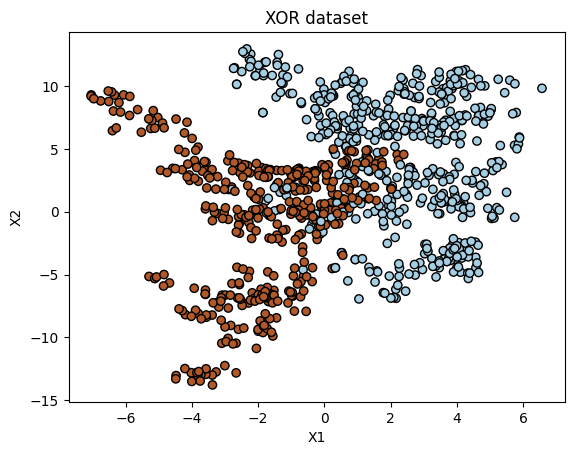

In [2]:
#1. Load dataset
data = pd.read_csv("data_banknote_authentication.csv", header=None)
data.head()

dataset = np.array(data)
m, n = np.shape(dataset)
print('Rows:', m, 'Columns:', n)

X = dataset[:, 0:2]
y = dataset[:, -1]

print('x:', np.shape(X))
print('y:', np.shape(y))
y = y.reshape(-1, 1)

#3. Split dataset
xTrain, xTest, yTrain, yTest = train_test_split(X,y,test_size=0.3, random_state=0)

plt.scatter(xTrain[:,0], xTrain[:,1], c = yTrain, cmap = plt.cm.Paired, edgecolors='k') # type: ignore
plt.xlabel("X1")
plt.ylabel("X2")
plt.title('XOR dataset')




In [3]:
#4. Implement the Neural Network (NN) algorithm:
    # 1. Initialize W's and b's
def init_w(m, nh, ny):

    np.random.seed(2)
    W1 = np.random.randn(nh, m) * 0.01
    b1 = np.zeros(shape=(nh, 1))
    W2 = np.random.randn(nh, nh) * 0.01
    b2 = np.zeros(shape=(nh, 1))
    W3 = np.random.randn(ny, nh) * 0.01
    b3 = np.zeros(shape=(ny, 1))
    
    
    W = {"W1": W1, "b1": b1, "W2": W2, "b2": b2, "W3": W3, "b3": b3}
    return W

#Testing the function
m = xTrain.shape[1] # features on x
nh = 2 # hidden neurons
ny = 1 # outputs units

W = init_w(m, nh, ny)
print(W['W1'].shape, 'W1:\n', W['W1'])
print(W['b1'].shape, 'b1:\n', W['b1'])
print(W['W2'].shape, 'W2:\n', W['W2'])
print(W['b2'].shape, 'b2:\n', W['b2'])
print(W['W3'].shape, 'W3:\n', W['W3'])
print(W['b3'].shape, 'b3:\n', W['b3'])

(2, 2) W1:
 [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]]
(2, 1) b1:
 [[0.]
 [0.]]
(2, 2) W2:
 [[-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
(2, 1) b2:
 [[0.]
 [0.]]
(1, 2) W3:
 [[-0.01057952 -0.00909008]]
(1, 1) b3:
 [[0.]]


In [4]:
# 2. Implement sigmoid function and forward function
#Sigmoid function
def sigmoid(z):
    g = 1/(1+np.exp(-z))
    return g

#Implement forward propagation to calculate ouput probabilites

def forward(x, W):
    W1 = W['W1']
    b1 = W['b1']
    W2 = W['W2']
    b2 = W['b2']
    W3 = W['W3']
    b3 = W['b3']

    a1= x
    Z2 = np.dot(a1, W1.T) + b1.T

    a2 = sigmoid(Z2)

    Z3 = np.dot(a2, W2.T) + b2.T
    a3 = sigmoid(Z3) 

    #Capa final 
    Z4 = np.dot(a3, W3.T) + b3
    a4 = sigmoid(Z4)

    Z = {'Z2': Z2, 'a2': a2, 'Z3': Z3,'Z4':Z4, 'a3': a3, 'a4': a4}
    return a4, Z


In [5]:
a4, Z = forward(xTrain, W)
print('a4 =', a4.shape)

a4 = (960, 1)


In [6]:
#3. Implement cost and sigmoid derivate functions
def cost(a, y):
    m = len(y)
    J = np.sum((a - y) ** 2) / (2*m)
    return J

#Derivative of sigmoid function
def d_sigmoid(z):
    ds = sigmoid(z) * (1 - sigmoid(z))
    return ds

In [7]:
print('Cost =', cost(a4, yTrain))

Cost = 0.12487549082075272


In [8]:
     # 4. Implement backpropagation function
def backp(W, Z, X, y):
    m = X.shape[1]
    
    W1 = W['W1']
    W2 = W['W2']
    W3 = W['W3']
    a2 = Z['a2']
    a3 = Z['a3']
    a4 = Z['a4']
    Z2 = Z['Z2']
    Z3 = Z['Z3']
    Z4 = Z['Z4']
    

    d4 = a4 - y   
    
    d3 = np.dot(d4, W3) * d_sigmoid(Z3)
    d2 = np.dot(d3, W2.T) * d_sigmoid(Z2)
    
    
    dW1 = (1/m) * np.dot(d2.T, X)
    dW2 = (1/m) * np.dot(d3.T, a2)
    dW3 = (1/m) * np.dot(d4.T, a3)
    db1 = (1/m) * np.sum(d2)
    db2 = (1/m) * np.sum(d3) 
    db3 = (1/m) * np.sum(d4)  
     
    
    grad = {'dW1': dW1, 'dW2': dW2, 'dW3': dW3, 'db1': db1, 'db2': db2, 'db3': db3}
    return grad

In [9]:
# 5. Implement and execute the NN model
def xor_model(x, y, nh, alpha = 0.01, epochs = 10000):
    np.random.seed(2)
    m = x.shape[1]
    ny = 1
    #1. Initialize W's
    W= init_w(m, nh, ny)

    #Initialize forward propagation to calculate initial cost 
    a4, Z = forward(x, W)

    J = []
    for i in range(epochs):
        
        #2. Calculate forward propagation
        a4, Z = forward(x, W)
        J.append(cost(a4, y))
        
        #3. Calculate backpropagation
        grad = backp(W, Z, x, y)
        
        #4. Update w's and b's here
        W['W1'] = W['W1'] - alpha * grad['dW1']   
        W['W2'] = W['W2'] - alpha * grad['dW2']
        W['W3'] = W['W3'] - alpha * grad['dW3']   
            
        W['b1'] = W['b1'] - alpha * grad['db1'] 
        W['b2'] = W['b2'] - alpha * grad['db2']   
        W['b3'] = W['b3'] - alpha * grad['db3']   
    
        
    
    
                
    print('Final cost:', J[epochs-1])
    return W, J


Final cost: 0.04426491389798315
W1 = [[-0.95938363 -0.23894185]
 [-0.91477441 -0.22649961]]
b1 =  [[0.34221119]
 [0.34221119]]
W2 =  [[-2.25945199 -2.11055222]
 [-2.0958741  -1.99994725]]
b2 =  [[1.51120816]
 [1.51120816]]
W3 =  [[-2.25945199 -2.11055222]
 [-2.0958741  -1.99994725]]
b3 =  [[2.81064378]]


Text(0, 0.5, 'cost')

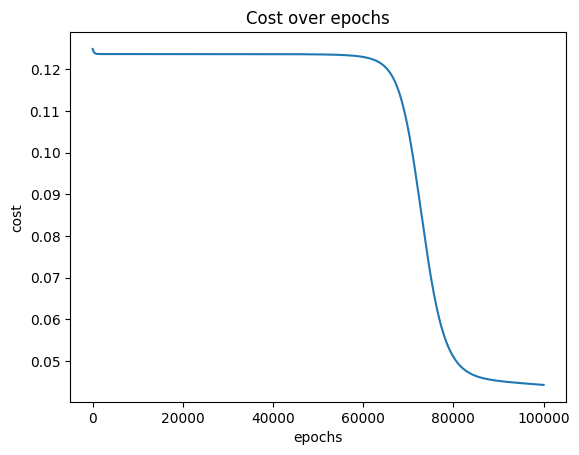

In [10]:

W, J = xor_model(xTrain, yTrain, nh, alpha = 0.00001, epochs=100000)


print('W1 =', W['W1'])
print("b1 = ", W['b1'])
print("W2 = ", W['W2'])
print("b2 = ", W['b2'])
print("W3 = ", W['W2'])
print("b3 = ", W['b3'])

#5. Plot Cost
plt.plot(J)
plt.title('Cost over epochs')
plt.xlabel('epochs')
plt.ylabel('cost')

In [11]:
# 6. Implement prediction, accuracy, and decision boundary functions
def predict(x, W):
    a3, Z = forward(x, W)
    y_hat = list(map(lambda x: 1 if x > 0.5 else 0, a3))
    y_hat = np.array(y_hat)
    y_hat = y_hat.reshape(-1, 1)
    return y_hat

def accuracy(y_hat, y):
    m = len(y)
    tptn = (y == y_hat).sum()
    acc = tptn / m    
    return acc

def decision_boundary(x, y, w, ax):
    #Minimos y maximos de la gráfica
    x_min, x_max = x[:, 0].min() - 0.5, x[:, 0].max() + 0.5
    y_min, y_max = x[:, 1].min() - 0.5, x[:, 1].max() + 0.5
    h = 0.01

    #Matriz para graficar una superficie
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    #Valores para que dar color a la superficie dependiendo de las predicciones
    Z1 = predict(np.c_[xx.ravel(), yy.ravel()], w)

    #Convertir en matriz el vector de predicciones
    Z1 = Z1.reshape(xx.shape)

    #Graficar la superficie
    ax.contourf(xx, yy, Z1, cmap =plt.cm.tab20c)
    ax.scatter(x[:, 0], x[:, 1], c = y.squeeze(), cmap=plt.cm.tab20c)

Text(0, 0.5, 'x1')

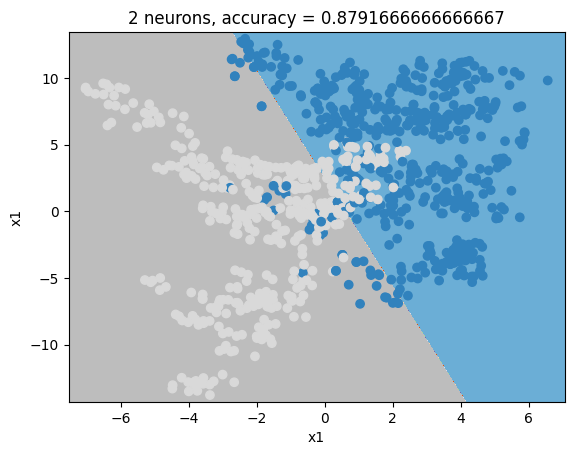

In [12]:
    # 7. Plot the prediction for Training dataset with its decision boundary
y_hat = predict(xTrain, W)
acc = accuracy(y_hat, yTrain)
ax = plt.subplot()
decision_boundary(xTrain, yTrain, W, ax)
ax.set_title('2 neurons, accuracy = '+ str(acc))
ax.set_xlabel('x1')
ax.set_ylabel('x1')


Final cost: 0.023658434506527843
Final cost: 0.026415684818458875
Final cost: 0.023470342444644875
Final cost: 0.02129380705477352


C:\Users\diegu\AppData\Local\Temp\ipykernel_19640\2825100021.py:4: RuntimeWarning: overflow encountered in exp
  g = 1/(1+np.exp(-z))


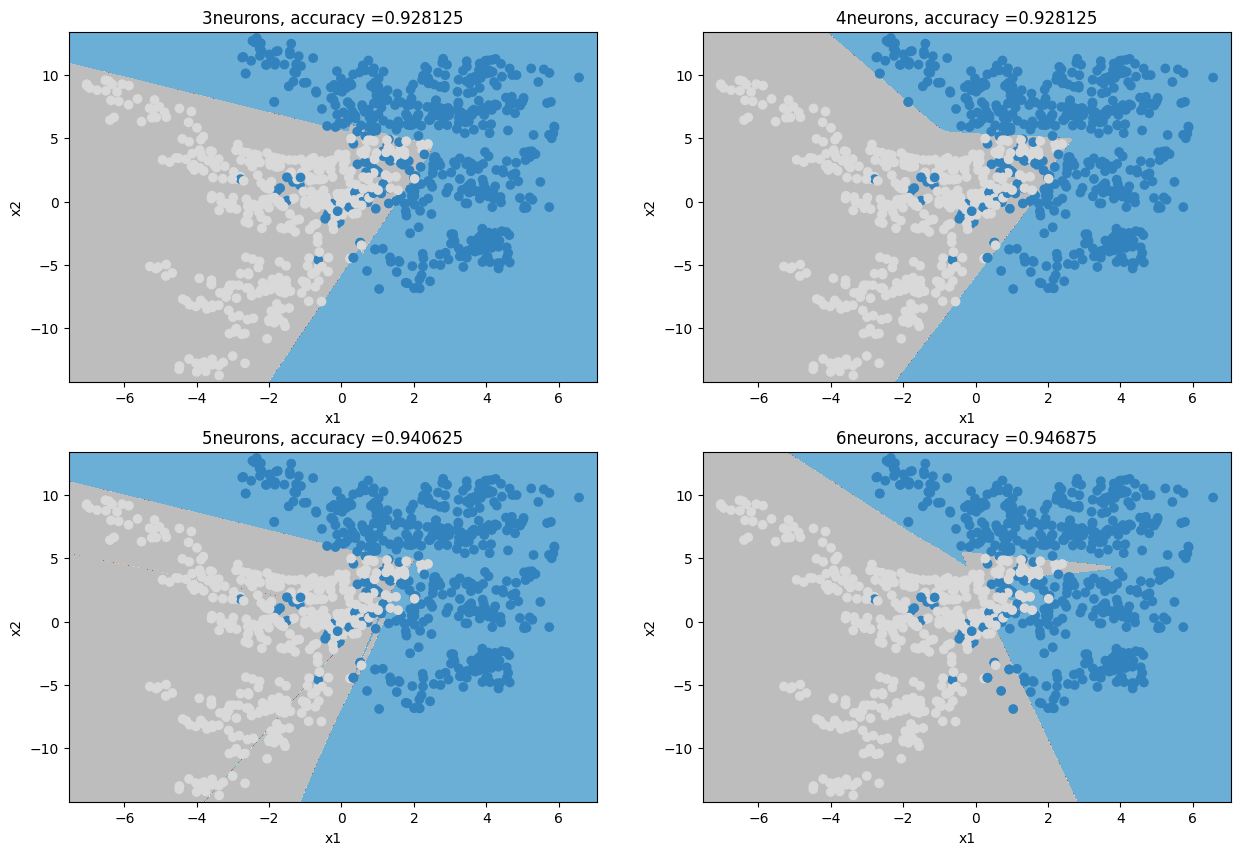

In [13]:
# 8. Add 3, 4, 5, and 6 neurons to the hidden layer of the NN
hidden = [3, 4, 5, 6]

axi = 1
f, axa = plt.subplots(2, 2, figsize = (15, 10))

for h in hidden:
    W, J = xor_model(xTrain, yTrain, h, alpha = 0.01, epochs = 100000)
    y_hat = predict(xTrain, W)
    acc = accuracy(y_hat, yTrain)
    ax = plt.subplot(2, 2, axi)
    axi = axi + 1
    decision_boundary(xTrain, yTrain, W, ax)
    ax.set_title(str(h)+'neurons, accuracy ='+str(acc))
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')